<a href="https://www.kaggle.com/code/manjitbaishya001/hotel-booking-cancellation-prediction?scriptVersionId=230199581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Hotel Booking Cancellation Prediction**
---

# **Importing Data**
---

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = os.path.join(dirname, filename)

# disable warnings
import warnings
warnings. filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(src)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


| Index | Variable                        | Description                                                     |
|-------|---------------------------------|-----------------------------------------------------------------|
| 1     | hotel                           | Type of hotel (Resort Hotel, City Hotel)                        |
| 2     | is_canceled                     | Reservation cancellation status (0 = not canceled, 1 = canceled)|
| 3     | lead_time                       | Number of days between booking and arrival                      |
| 4     | arrival_date_year               | Year of arrival                                                 |
| 5     | arrival_date_month              | Month of arrival                                                |
| 6     | arrival_date_week_number        | Week number of the year for arrival                             |
| 7     | arrival_date_day_of_month       | Day of the month of arrival                                     |
| 8     | stays_in_weekend_nights         | Number of weekend nights (Saturday and Sunday) the guest stayed or booked |
| 9     | stays_in_week_nights            | Number of week nights the guest stayed or booked                |
| 10    | adults                          | Number of adults                                                |
| 11    | children                        | Number of children                                              |
| 12    | babies                          | Number of babies                                                |
| 13    | meal                            | Type of meal booked (BB, FB, HB, SC, Undefined)                 |
| 14    | country                         | Country of origin of the guest                                  |
| 15    | market_segment                  | Market segment designation                                      |
| 16    | distribution_channel            | Booking distribution channel                                    |
| 17    | is_repeated_guest               | If the guest is a repeat customer (0 = not repeated, 1 = repeated) |
| 18    | previous_cancellations          | Number of previous bookings that were canceled by the customer  |
| 19    | previous_bookings_not_canceled  | Number of previous bookings that were not canceled by the customer |
| 20    | reserved_room_type              | Type of reserved room                                           |
| 21    | assigned_room_type              | Type of assigned room                                           |
| 22    | booking_changes                 | Number of changes made to the booking                           |
| 23    | deposit_type                    | Type of deposit made (No Deposit, Refundable, Non Refund)       |
| 24    | agent                           | ID of the travel agent responsible for the booking              |
| 25    | company                         | ID of the company responsible for the booking                   |
| 26    | days_in_waiting_list            | Number of days the booking was in the waiting list              |
| 27    | customer_type                   | Type of customer (Transient, Contract, Transient-Party, Group)  |
| 28    | adr                             | Average Daily Rate                                              |
| 29    | required_car_parking_spaces     | Number of car parking spaces required                           |
| 30    | total_of_special_requests       | Number of special requests made                                 |
| 31    | reservation_status              | Last reservation status (Check-Out, Canceled, No-Show)          |
| 32    | reservation_status_date         | Date of the last reservation status                             |
| 33    | name                            | Guest's name                                                    |
| 34    | email                           | Guest's email address                                           |
| 35    | phone-number                    | Guest's phone number                                            |
| 36    | credit_card                     | Last four digits of the guest's credit card                     |

# **Data Cleaning**
---

In [3]:
df.head(1).T

,0
hotel,Resort Hotel
is_canceled,0
lead_time,342
arrival_date_year,2015
arrival_date_month,July
arrival_date_week_number,27
arrival_date_day_of_month,1
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- **Checking for `NaN` Values**

In [5]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- **Managing missing values**

In [6]:
# cleaning missing values
df['company'] = df['company'].fillna('None')
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
df.dropna(inplace=True)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
df.duplicated().sum()

0

# **Feature Engineering**

In [8]:
# defining all numerical columns
num_cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
    'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr',
    'total_of_special_requests'
]

# defining all categorical columns
cat_cols = [
    'hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'distribution_channel',
    'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type',
    'required_car_parking_spaces', 'reservation_status', 'company'
]

target = ['is_canceled']

# Correcting the DataFrame selection
df = df[num_cols + cat_cols + target]

## **Searching for highly correlated features**

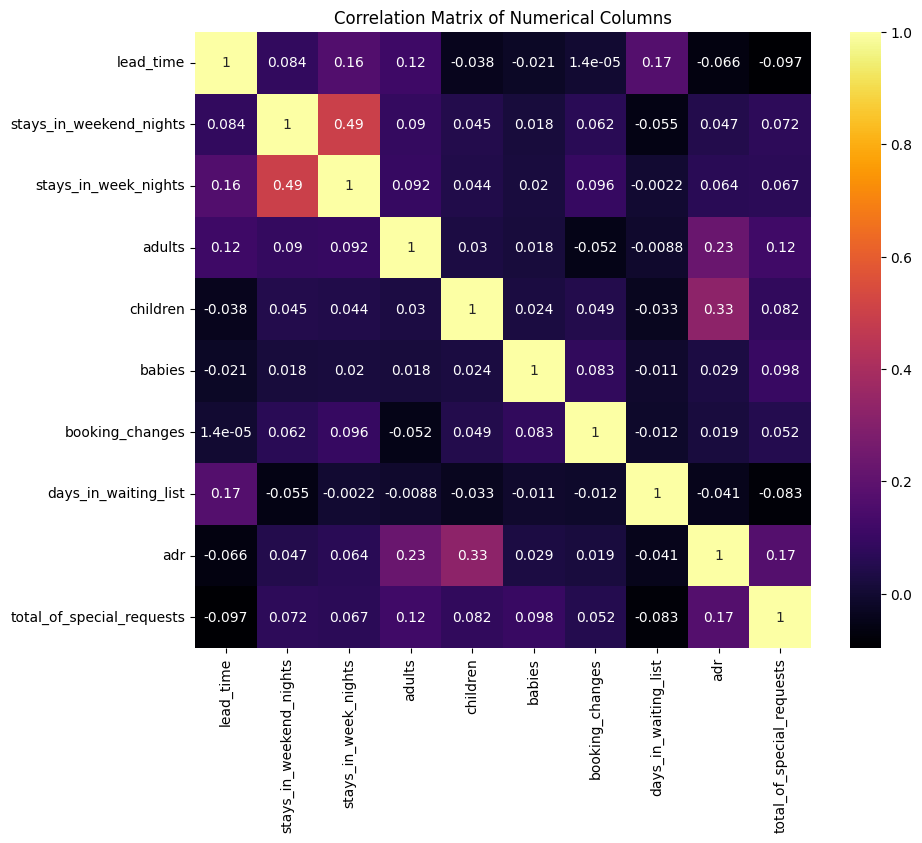

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap for numerical columns
corr_mat = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='inferno', square=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# initialize label encoder
encoder = LabelEncoder()

# apply label encoder to each column individually
for column in df[cat_cols]:
    df[column] = df[column].astype(str)
    df[column] = encoder.fit_transform(df[column])

df.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,adr,total_of_special_requests,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,required_car_parking_spaces,reservation_status,company,is_canceled
0,342,0,0,2,0.0,0,3,0,0.0,0,...,0,2,2,0,0,2,0,1,349,0
1,737,0,0,2,0.0,0,4,0,0.0,0,...,0,2,2,0,0,2,0,1,349,0
2,7,0,1,1,0.0,0,0,0,75.0,0,...,0,0,2,0,0,2,0,1,349,0
3,13,0,1,1,0.0,0,0,0,75.0,0,...,0,0,0,0,157,2,0,1,349,0
4,14,0,2,2,0.0,0,0,0,98.0,1,...,0,0,0,0,103,2,0,1,349,0


In [11]:
from sklearn.preprocessing import StandardScaler

# initialize the standard scaler
scaler = StandardScaler()

# apply the standard scaler to each column individually
for column in num_cols:
    # reshape the column to a 2D array
    df[column] = scaler.fit_transform(df[[column]])

# display the first few rows of the dataframe
df.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,adr,total_of_special_requests,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,required_car_parking_spaces,reservation_status,company,is_canceled
0,2.223443,-0.932428,-1.316805,0.244732,-0.261054,-0.081617,4.256959,-0.132199,-2.020346,-0.721236,...,0,2,2,0,0,2,0,1,349,0
1,5.918392,-0.932428,-1.316805,0.244732,-0.261054,-0.081617,5.788886,-0.132199,-2.020346,-0.721236,...,0,2,2,0,0,2,0,1,349,0
2,-0.910249,-0.932428,-0.790533,-1.483657,-0.261054,-0.081617,-0.338822,-0.132199,-0.534809,-0.721236,...,0,0,2,0,0,2,0,1,349,0
3,-0.854123,-0.932428,-0.790533,-1.483657,-0.261054,-0.081617,-0.338822,-0.132199,-0.534809,-0.721236,...,0,0,0,0,157,2,0,1,349,0
4,-0.844769,-0.932428,-0.264260,0.244732,-0.261054,-0.081617,-0.338822,-0.132199,-0.079245,0.540315,...,0,0,0,0,103,2,0,1,349,0


In [12]:
X = df.drop('is_canceled', axis = 1)
y = df['is_canceled']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred)
class_report_dt = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')
print(f'F1 Score: {f1_dt}')
# print('Confusion Matrix:')
# print(conf_matrix_dt)
print('Classification Report:')
print(class_report_dt)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18670
           1       1.00      1.00      1.00     11056

    accuracy                           1.00     29726
   macro avg       1.00      1.00      1.00     29726
weighted avg       1.00      1.00      1.00     29726



---